#### Lib Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import functions as f
import algorythm as alg
import math
from sklearn.cluster import KMeans


In [2]:
url = "https://pastebin.com/raw/j30qh61S"
#resp = urllib.request.urlopen(url_data)
data1 = pd.read_csv(r'./dataset/Sochi10-11.csv', header=0, sep =',')

In [3]:
data1 = data1.loc[data1['temperatureAvg'] > 1]
data1 = data1.loc[data1['temperatureSdv'] > 1]
#data1 = data1.loc[data1['temperatureSdv'] < 2000]
data1 = data1.loc[data1['temperatureMax'] > 1]
data1 = data1.loc[data1['temperatureMin'] > 1]
data1 = data1.loc[data1['temperatureAvgExt'] > 1]
data1 = data1.loc[data1['temperatureSdvExt'] > 1]
data1 = data1.loc[data1['id']  > 1]
#data1 = data1.loc[data1['distance']  > 1]
data1 = data1.loc[data1['temperatureAvg'] < 3500]
#data1 = data1.loc[data1['temperatureAvg'] > 2400]
#data1 = data1.loc[data1['mappingError'] < 0.1]
#data1 = data1.loc[data1['temperatureSdv'] < 500]

Text(0.5, 1.0, 'Зависимость распознанных событий id от времени')

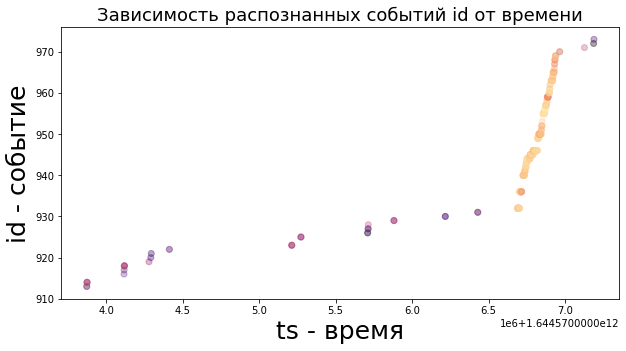

In [4]:
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(data1['ts'], data1['id'], c = data1['temperatureAvg'], cmap = "magma", alpha=0.1)
plot.set_xlabel('ts - время', fontsize = 25, color = 'black')
plot.set_ylabel('id - событие', fontsize = 25, color = 'black')
plot.set_title('Зависимость распознанных событий id от времени',  fontsize = 18, color = 'black')

Text(0.5, 1.0, 'Зависимость температуры распознанных событий от времени')

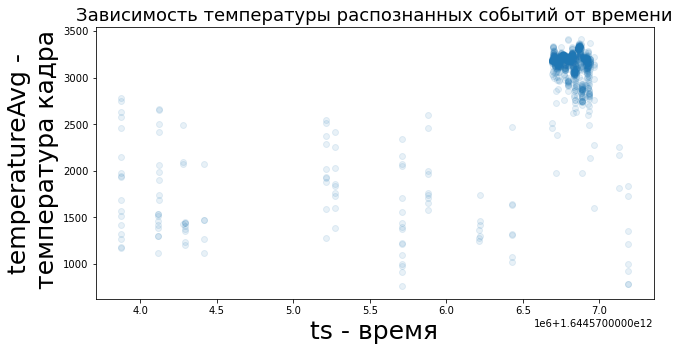

In [5]:
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(data1['ts'], data1['temperatureAvg'], alpha=0.1)
plot.set_xlabel('ts - время', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'black')

plot.set_title('Зависимость температуры распознанных событий от времени',  fontsize = 18, color = 'black')

In [6]:
data1.describe()

,id,distance,ts,x,y,w,h,ts_ir,x_ir,y_ir,w_ir,h_ir,temperatureAvg,temperatureSdv,temperatureMin,temperatureMax,temperatureAvgExt,temperatureSdvExt,mappingError,markup
count,1172.000000,1172.000000,1.172000e+03,1172.000000,1172.000000,1172.000000,1172.000000,1.172000e+03,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.0
mean,946.565700,184.775627,1.644577e+12,0.519162,0.499450,0.069015,0.153571,1.644577e+12,0.515518,0.594760,0.139294,0.231238,3000.691468,376.707964,1910.805461,3454.793515,1784.122002,431.460852,0.096509,-1.0
std,12.271687,80.906333,6.079529e+05,0.043057,0.056132,0.014963,0.033969,6.079190e+05,0.085277,0.083672,0.029861,0.050063,493.179140,200.132741,577.694202,270.113422,202.684973,100.242992,0.023470,0.0
min,913.000000,65.979390,1.644574e+12,0.393750,0.288889,0.018750,0.040741,1.644574e+12,0.268229,0.281250,0.039062,0.062500,757.664400,4.883564,468.000000,1375.000000,1327.054000,144.611000,0.002670,-1.0
25%,940.000000,151.351300,1.644577e+12,0.487500,0.492593,0.066667,0.144445,1.644577e+12,0.453125,0.583333,0.135417,0.218750,3068.645250,254.461925,1497.000000,3512.000000,1691.897500,381.158325,0.092545,-1.0
50%,946.000000,164.705900,1.644577e+12,0.535417,0.514815,0.070833,0.159259,1.644577e+12,0.549479,0.618056,0.143229,0.239583,3187.037000,279.465650,2171.000000,3533.000000,1764.012000,427.335400,0.092545,-1.0
75%,955.000000,175.000000,1.644577e+12,0.552083,0.529630,0.077083,0.170370,1.644577e+12,0.580729,0.635417,0.156250,0.256945,3220.748500,427.732500,2353.000000,3552.000000,1830.819250,485.997450,0.116472,-1.0
max,973.000000,622.222800,1.644577e+12,0.620833,0.625926,0.133333,0.359259,1.644577e+12,0.718750,0.784722,0.268229,0.538194,3410.222000,1058.844000,3001.000000,3618.000000,3106.604000,770.852600,0.116472,-1.0


In [7]:
unique = data1['id'].unique()
mean = []
for item in unique:
    mean += [data1.loc[data1['id'] == item]['id'].count()]

In [8]:
data_count = pd.DataFrame({'id': unique, 'count': mean})
data_count = data_count.sort_values(by=['count'])
data_count = data_count.reset_index(drop=True)
print(data_count['count'].describe())

count     51.000000
mean      22.980392
std       29.825821
min        1.000000
25%        5.500000
50%       10.000000
75%       28.000000
max      140.000000
Name: count, dtype: float64


Text(0.5, 0, 'Событие')

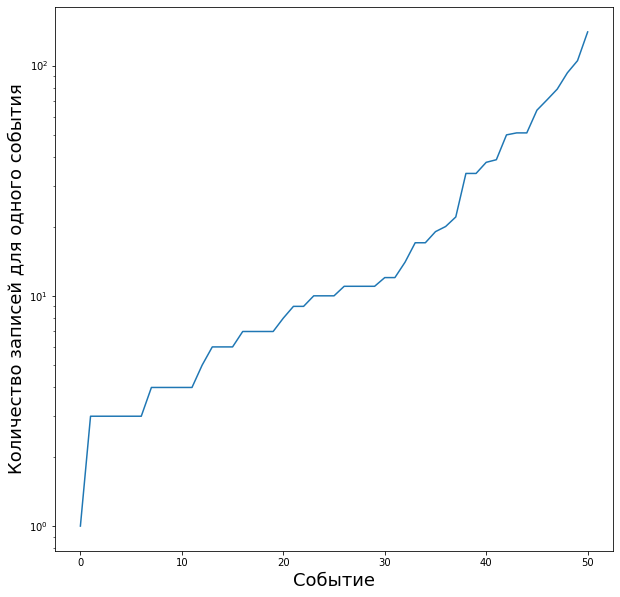

In [9]:
fig = plt.figure(figsize=(10, 10))
plot = fig.add_subplot(111)
plot.set_yscale('log')
plot.plot(data_count.index, data_count['count'], alpha=1)
plot.set_ylabel('Количество записей для одного события',  fontsize = 18, color = 'black')
plot.set_xlabel('Событие',  fontsize = 18, color = 'black')

In [10]:
model = f.Model(data1, 15)
model.filter(1)
data2 = model.df_all

In [11]:
clusters = alg.clusterise(data1,number_of_clusters=5)
clusters1 = alg.clusterise(data2,number_of_clusters=5)

In [14]:
f.draw_clusters(clusters, clusters1, close_data_size_koef=5, print_points = True, main=False)

Text(0.5, 1.0, 'Кластеризация событий по времени')

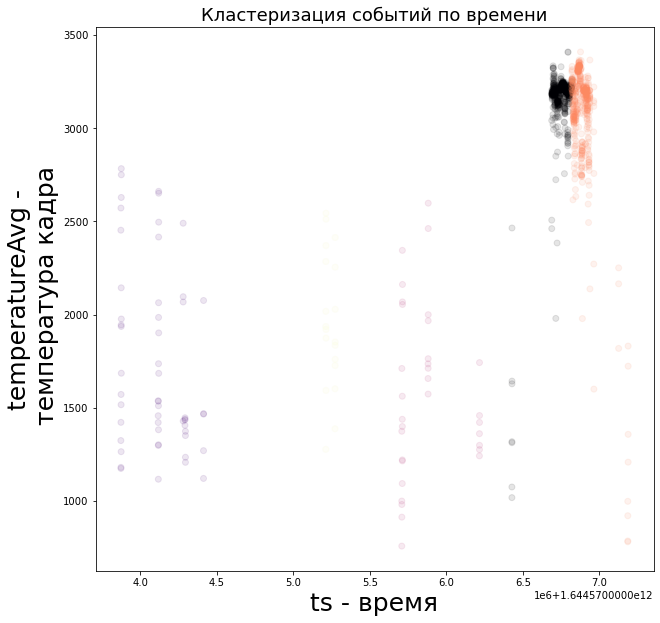

In [15]:
fig = plt.figure(figsize=(10, 10))
plot = fig.add_subplot(111)
plot.scatter(data1['ts'], data1['temperatureAvg'], c = data1['cluster'],alpha=0.1, cmap = "magma")
plot.set_xlabel('ts - время', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'black')
plot.set_title('Кластеризация событий по времени',  fontsize = 18, color = 'black')

In [16]:
main_mean_list = f.mean_list(data1)
algo_set_avg = alg.create_trend(main_mean_list, close_data_size = 50, ratio = 0)
mean_set_avg = alg.create_sdv_trend(main_mean_list, algo_set_avg, close_data_size= 10000, ratio=0)
border = algo_set_avg + mean_set_avg

IndexError: index 51 is out of bounds for axis 0 with size 51

In [ ]:
fig = plt.figure(figsize=(10,10))
plot = fig.add_subplot(111)
plot.scatter(data1['id'].unique(),main_mean_list, color = 'black', alpha=0.5)
plot.plot(data1['id'].unique(), algo_set_avg, color = 'yellow')
plot.plot(data1['id'].unique(), border, color = 'green')
plot.set_xlabel('ID')
plot.set_ylabel('Средняя температура события')
plot.set_title("Скользящая средняя и отклонение на скользящее среднеквадратичное отклонение, в зависимости от id.")

In [ ]:
data_cluster = clusters[2]

In [ ]:
x = np.array(range(20))
y = np.array([pow(1.07, xi) for xi in x])
plt.plot(x,y)
plt.grid()

In [ ]:
fig = plt.figure(figsize=(20,10))
plot = fig.add_subplot(111)
plot.scatter(data_cluster['ts'],data_cluster['temperatureAvg'], color = 'black', alpha=0.1)
plot.set_xlabel('ts', fontsize = 18)
plot.set_ylabel('temperatureAvg', fontsize = 18)
plot.set_title("Зависимость температуры объекта от времени",fontsize = 18)